In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Phase 1 - A

In [10]:
df = pd.read_csv('reviewdataset1.csv')

In [11]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary
0,3190,B000FDKUSO,A3PENBFALXOATY,lychee07,0,0,5,1343347200,"LOVED IT, SHARED IT, EVERYONE LOVED IT"
1,3191,B000FDKUSO,A2U8853VUAU0I,Ohmygosh,0,0,5,1339545600,best snack
2,3192,B000FDKUSO,A17KUCXAV34USP,Gobi55,0,1,5,1334016000,"Delicious, low calorie and healthy snack. Good..."
3,3193,B000LKXQ32,A2L1SNVFML2CUQ,jazzyunderpants,2,2,5,1325808000,The best organic green tea available in teabags.
4,3194,B000LKXQ32,A16Z0ZFQNWNPD4,Mary,2,2,5,1323216000,Refined Tea Taste


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7981 entries, 0 to 7980
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      7981 non-null   int64 
 1   ProductId               7981 non-null   object
 2   UserId                  7981 non-null   object
 3   ProfileName             7981 non-null   object
 4   HelpfulnessNumerator    7981 non-null   int64 
 5   HelpfulnessDenominator  7981 non-null   int64 
 6   Score                   7981 non-null   int64 
 7   Time                    7981 non-null   int64 
 8   Summary                 7981 non-null   object
dtypes: int64(5), object(4)
memory usage: 561.3+ KB


In [13]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,7981.000000,7981.000000,7981.000000,7981.000000,7.981000e+03
mean,5868.009147,1.600802,2.103997,3.915675,1.295554e+09
std,2547.918818,5.319870,5.974483,1.403462,4.688017e+07
min,2.000000,0.000000,0.000000,1.000000,1.075421e+09
25%,4014.000000,0.000000,0.000000,3.000000,1.271203e+09
50%,6009.000000,0.000000,1.000000,5.000000,1.309046e+09
75%,8004.000000,2.000000,2.000000,5.000000,1.330301e+09
max,9999.000000,187.000000,216.000000,5.000000,1.351210e+09


In [14]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
dtype: int64

In [15]:
df.duplicated().sum()

0

Phase 1 - B

Distro of ratings

<Axes: xlabel='Score', ylabel='count'>

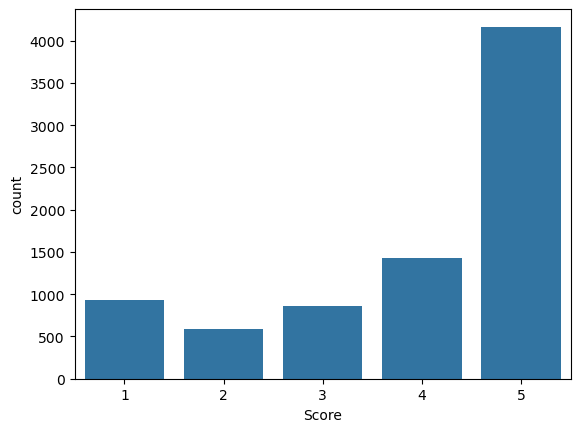

In [16]:
sns.barplot(df['Score'].value_counts())

In [17]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary
0,3190,B000FDKUSO,A3PENBFALXOATY,lychee07,0,0,5,1343347200,"LOVED IT, SHARED IT, EVERYONE LOVED IT"
1,3191,B000FDKUSO,A2U8853VUAU0I,Ohmygosh,0,0,5,1339545600,best snack
2,3192,B000FDKUSO,A17KUCXAV34USP,Gobi55,0,1,5,1334016000,"Delicious, low calorie and healthy snack. Good..."
3,3193,B000LKXQ32,A2L1SNVFML2CUQ,jazzyunderpants,2,2,5,1325808000,The best organic green tea available in teabags.
4,3194,B000LKXQ32,A16Z0ZFQNWNPD4,Mary,2,2,5,1323216000,Refined Tea Taste


In [18]:
df['Sentiment'] = df['Score'].map({1: 'Negative', 2: 'Negative', 3: 'Neutral', 4: 'Positive', 5: 'Positive'})
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Sentiment
0,3190,B000FDKUSO,A3PENBFALXOATY,lychee07,0,0,5,1343347200,"LOVED IT, SHARED IT, EVERYONE LOVED IT",Positive
1,3191,B000FDKUSO,A2U8853VUAU0I,Ohmygosh,0,0,5,1339545600,best snack,Positive
2,3192,B000FDKUSO,A17KUCXAV34USP,Gobi55,0,1,5,1334016000,"Delicious, low calorie and healthy snack. Good...",Positive
3,3193,B000LKXQ32,A2L1SNVFML2CUQ,jazzyunderpants,2,2,5,1325808000,The best organic green tea available in teabags.,Positive
4,3194,B000LKXQ32,A16Z0ZFQNWNPD4,Mary,2,2,5,1323216000,Refined Tea Taste,Positive
